In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import sys
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


**import dataset**

We are going to import from csv the dataset heart.csv and o2saturation.csv. We are going to separate the features from the target label. We are going to add 02 saturation as a feature



    Age : Age of the patient

    Sex : Sex of the patient

    exang: exercise induced angina (1 = yes; 0 = no)

    ca: number of major vessels (0-3)

    cp : Chest Pain type chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic

    trtbps : resting blood pressure (in mm Hg)

    chol : cholestoral in mg/dl fetched via BMI sensor

    fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

    rest_ecg : resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

    thalach : maximum heart rate achieved

    target : 0= less chance of heart attack 1= more chance of heart attack


In [2]:
# paths to data
Heart_PATH = "../input/heart-attack-analysis-prediction-dataset/heart.csv"

In [3]:
#read data
heart_ds = pd.read_csv(Heart_PATH)
display(heart_ds.head())
display(heart_ds.info())
display(heart_ds.shape)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

(303, 14)

In [4]:
#check for missing values
heart_ds.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
num_patients = len(heart_ds.index)
feature_names = list(heart_ds.columns)
print(feature_names)
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


In [6]:
heart_ds[con_cols].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


**DATA CLEANING AND OUTLIERS REMOVAL**

In [7]:
# data cleaned with intuitives values but can also remove under 25% and/or above 75%
heart_ds = heart_ds[heart_ds['oldpeak'] < 3]
heart_ds = heart_ds[heart_ds['chol'] < 350]
heart_ds = heart_ds[heart_ds['thalachh'] > 90]
heart_ds[con_cols].describe()

,age,trtbps,chol,thalachh,oldpeak
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,54.033582,130.533582,241.186567,150.876866,0.786194
std,9.221514,16.755199,42.737623,22.420975,0.852577
min,29.000000,94.000000,126.000000,95.000000,0.000000
25%,47.000000,120.000000,211.000000,136.750000,0.000000
50%,54.000000,130.000000,239.000000,154.500000,0.500000
75%,60.250000,140.000000,269.250000,168.000000,1.400000
max,77.000000,192.000000,342.000000,202.000000,2.900000


**VISALIZATION AND EXPLORTATION**

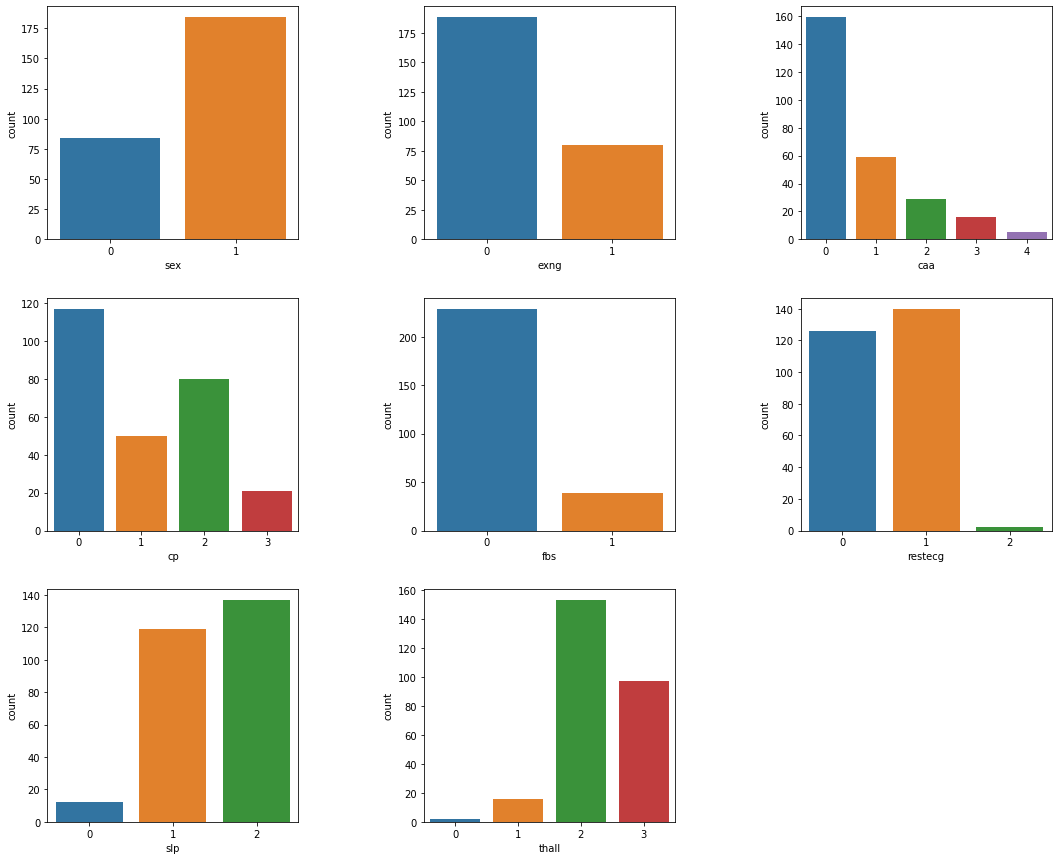

In [8]:
#classification features plotting
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])

for feature, i in zip(cat_cols,range(8)):
    axs = getattr(sys.modules[__name__], f"ax{i}")
    sns.countplot(ax = axs ,data = heart_ds,x = str(feature))


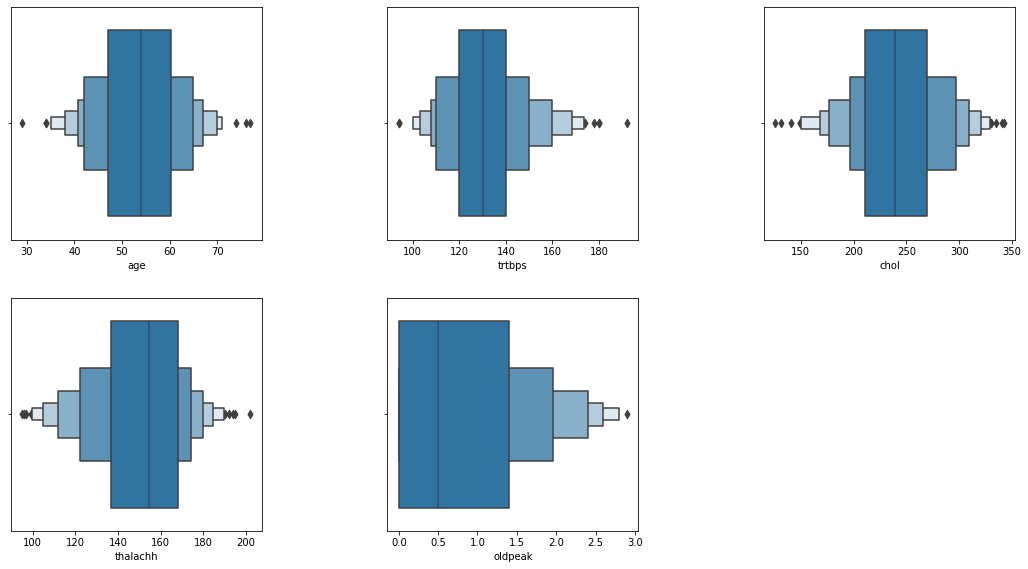

In [9]:
#continuous features plotting
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

for feature, i in zip(con_cols,range(5)):
    axs = getattr(sys.modules[__name__], f"ax{i}")
    sns.boxenplot(ax = axs ,data = heart_ds,x = str(feature))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


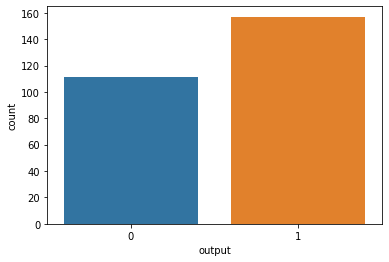

In [10]:
#plot target
sns.countplot(heart_ds['output'])
plt.show()

<AxesSubplot:>

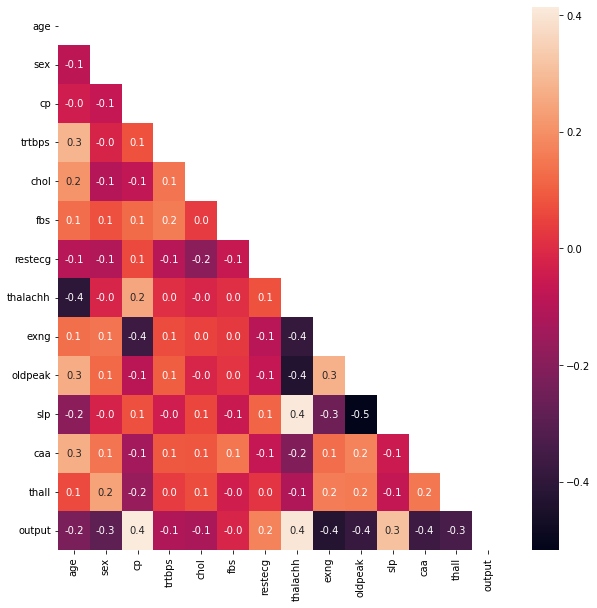

In [11]:
#visualize data and correlations
plt.figure(figsize = (10,10))
df_corr = heart_ds.corr().transpose()
mask = np.triu(np.ones_like(df_corr))
sns.heatmap(df_corr,mask = mask, fmt=".1f", cbar = True, annot = True)


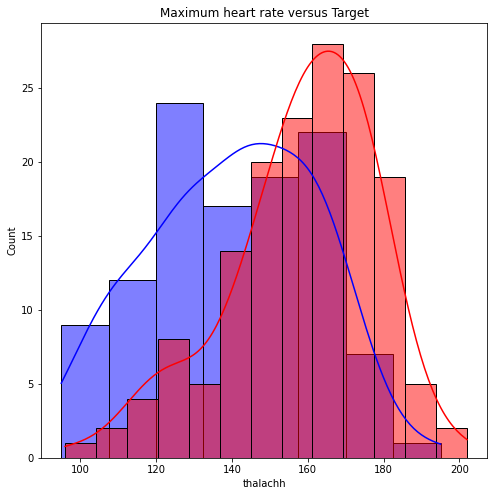

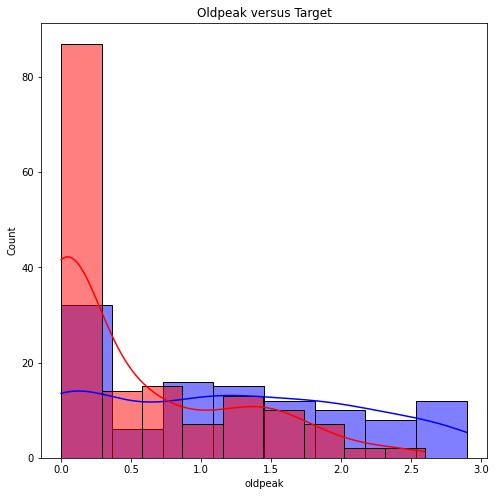

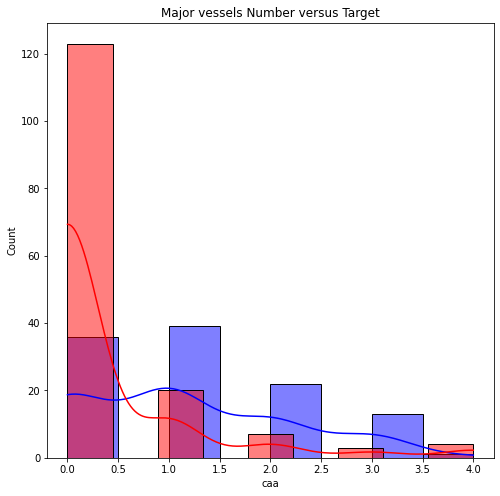

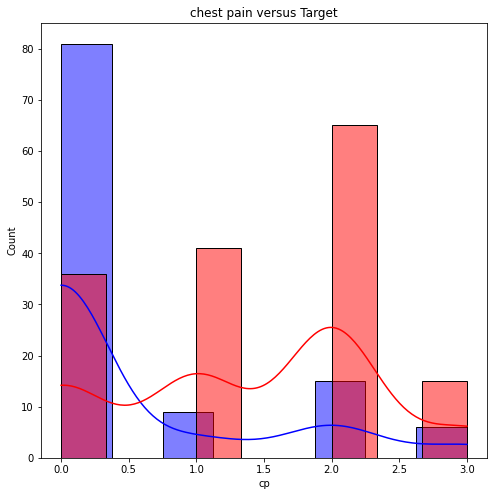

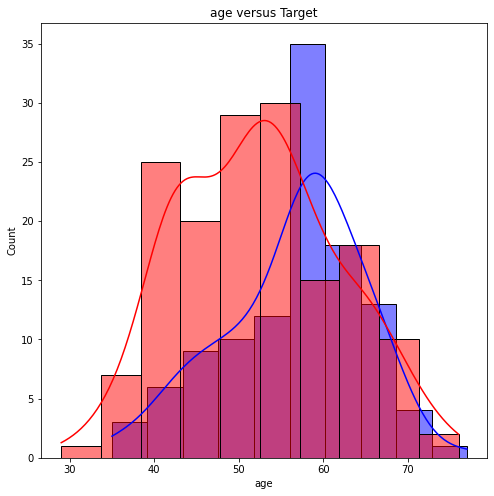

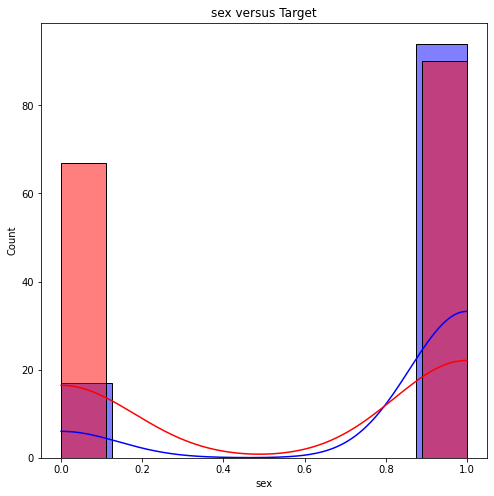

In [12]:
#check some distributions between targets and features base on correlation map
plt.figure(figsize=(8,8))
sns.histplot(heart_ds[heart_ds['output'] == 0]["thalachh"], color='blue',kde=True,) 
sns.histplot(heart_ds[heart_ds['output'] == 1]["thalachh"], color='red',kde=True)
plt.title('Maximum heart rate versus Target')
plt.show()

plt.figure(figsize=(8,8))
sns.histplot(heart_ds[heart_ds['output'] == 0]["oldpeak"], color='blue',kde=True,) 
sns.histplot(heart_ds[heart_ds['output'] == 1]["oldpeak"], color='red',kde=True)
plt.title('Oldpeak versus Target')
plt.show()

plt.figure(figsize=(8,8))
sns.histplot(heart_ds[heart_ds['output'] == 0]["caa"], color='blue',kde=True,) 
sns.histplot(heart_ds[heart_ds['output'] == 1]["caa"], color='red',kde=True)
plt.title('Major vessels Number versus Target')
plt.show()

plt.figure(figsize=(8,8))
sns.histplot(heart_ds[heart_ds['output'] == 0]["cp"], color='blue',kde=True,) 
sns.histplot(heart_ds[heart_ds['output'] == 1]["cp"], color='red',kde=True)
plt.title('chest pain versus Target')
plt.show()

plt.figure(figsize=(8,8))
sns.histplot(heart_ds[heart_ds['output'] == 0]["age"], color='blue',kde=True,) 
sns.histplot(heart_ds[heart_ds['output'] == 1]["age"], color='red',kde=True)
plt.title('age versus Target')
plt.show()

plt.figure(figsize=(8,8))
sns.histplot(heart_ds[heart_ds['output'] == 0]["sex"], color='blue',kde=True,) 
sns.histplot(heart_ds[heart_ds['output'] == 1]["sex"], color='red',kde=True)
plt.title('sex versus Target')
plt.show()

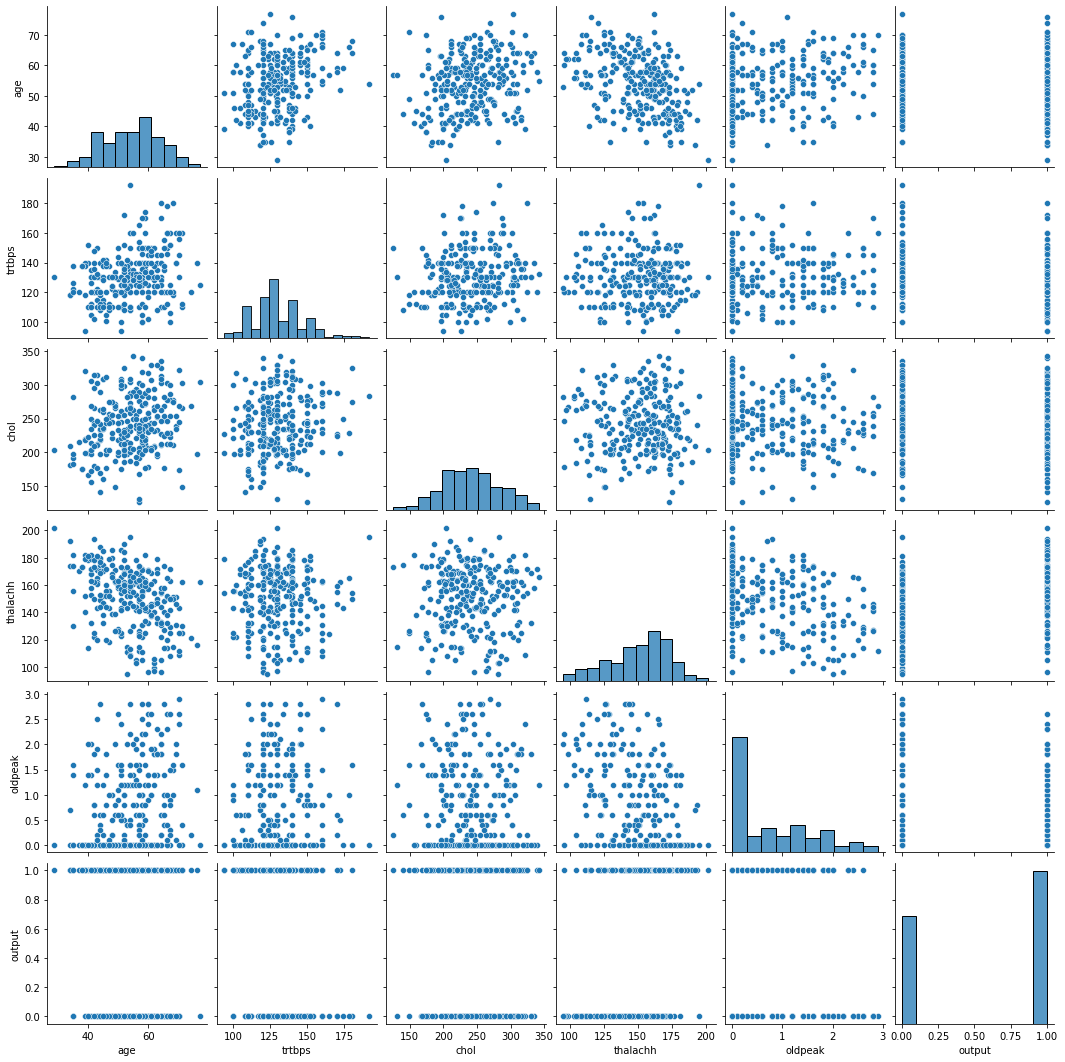

In [13]:
#visualize scatter plots for continuous features using pairplots
features_and_target = ["age","trtbps","chol","thalachh","oldpeak", 'output']
sns.pairplot(heart_ds[features_and_target])

**MODELLING**

In [14]:
from sklearn.preprocessing import StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split

#feature selector
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, cross_validate

print('Packages imported...')

Packages imported...


In [15]:
# we will try first to encode the categorical features
ds = heart_ds
ds = pd.get_dummies(ds,columns = cat_cols, drop_first = True)
display(ds.head())
print(ds.columns)

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,exng_1,caa_1,caa_2,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
2,41,130,204,172,1.4,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5,57,140,192,148,0.4,1,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
6,56,140,294,153,1.3,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output', 'sex_1',
       'exng_1', 'caa_1', 'caa_2', 'caa_3', 'caa_4', 'cp_1', 'cp_2', 'cp_3',
       'fbs_1', 'restecg_1', 'restecg_2', 'slp_1', 'slp_2', 'thall_1',
       'thall_2', 'thall_3'],
      dtype='object')


In [16]:
y = ds['output']
X = ds.drop(['output'], axis = 1)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is ", X_train.shape)
print("The shape of X_test is ",X_test.shape)
print("The shape of y_train is ",y_train.shape)
print("The shape of y_test is ",y_test.shape)

The shape of X_train is  (214, 22)
The shape of X_test is  (54, 22)
The shape of y_train is  (214,)
The shape of y_test is  (54,)


In [18]:
#use of pipeline to avoir leakage
scaler = StandardScaler()
svc = SVC(kernel='linear', C=1, random_state=42)
tree = DecisionTreeClassifier(random_state = 42)
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,random_state=42)
svc_clf = Pipeline(steps=[['scaler',scaler],['svc',svc]])
tree_clf = Pipeline(steps=[['scaler',scaler],['tree',tree]])
boost_clf = Pipeline(steps=[['scaler',scaler],['boost',gbt]])
cv_svc = cross_validate(estimator=svc_clf,X=X_train,y=y_train,cv=5,scoring="f1",return_train_score=True)
cv_tree = cross_validate(estimator=tree_clf,X=X_train,y=y_train,cv=5,scoring="f1",return_train_score=True)
cv_boost = cross_validate(estimator=boost_clf,X=X_train,y=y_train,cv=5,scoring="f1",return_train_score=True)

In [19]:
#fitting the pipeline to the training data
svc_clf.fit(X_train,y_train)
tree_clf.fit(X_train,y_train)
boost_clf.fit(X_train,y_train)
      
#Predictions and model evaluation on unseen data
pred_svc = svc_clf.predict(X_test)
pred_tree = tree_clf.predict(X_test)
pred_boost = boost_clf.predict(X_test)
print("The test accuracy score of SVC is ", accuracy_score(y_test, pred_svc))
print("The test accuracy score of Tree Classifier is ", accuracy_score(y_test, pred_tree))
print("The test accuracy score of gradient boost classifier is ", accuracy_score(y_test, pred_boost))

The test accuracy score of SVC is  0.8703703703703703
The test accuracy score of Tree Classifier is  0.8888888888888888
The test accuracy score of gradient boost classifier is  0.9074074074074074


In [20]:
#we choose the gradient boost classifier for hypertuning
grid = GridSearchCV(boost_clf, {'boost__n_estimators' : [100, 150, 200, 250, 300, 350, 400]},  refit = True, verbose = 10,n_jobs=-1)
grid.fit(X_train, y_train) 
print(grid.best_params_)
print(grid.score(X_train, y_train))
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'boost__n_estimators': 250}
0.8878504672897196
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.97      0.89      0.93        36

    accuracy                           0.91        54
   macro avg       0.89      0.92      0.90        54
weighted avg       0.92      0.91      0.91        54



In [21]:
# scale data
# X_train_scale = X_train
# X_test_scale = X_test
# scaler = StandardScaler().fit(X_train[con_cols])
# X_train_scale[con_cols] = scaler.transform(X_train[con_cols])
# X_test_scale[con_cols] = scaler.transform(X_test[con_cols])
# display(X_train_scale.head())

In [22]:
#select most relevant features
# print(f'X shape is {X_train_scale.shape}')
# feature_selector = SelectKBest(mutual_info_classif, k=15).fit(X_train_scale,y_train)
# X_train_k = feature_selector.transform(X_train_scale)
# X_test_k = feature_selector.transform(X_test_scale)
# print(f'X_new shape is {X_train_k.shape}')

In [23]:
#print features chosen
# cols = feature_selector.get_support(indices=True)
# features_df_new = X_train_scale.iloc[:,cols]
# display(features_df_new.columns)

In [24]:
# clf = SVC(kernel='linear', C=1, random_state=26).fit(X_train_k,y_train)

# # predicting the values
# y_pred = clf.predict(X_test_k)

# # printing the test accuracy
# print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))